### to do bureucracy:
4. Prepare abstract.: add which useful use cases
6. How long should it be the discussion?


Ideas:
    - some real use cases?
    - talk also about the paper of Mall with conformable derivatives

# First examples from Lagaris

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy
import scipy.integrate as integrate

In the paper begin without initial condition! It will be easier, if you discuss about the universal theorem!

Plus some discussion on accuracy?

### Example 1

$$\frac{d\Psi}{dx} = -\Psi(x+\frac{1+3x^2}{1+x+x^3}) + x^3 + x^2\frac{1+3x^2}{1+x+x^3} + 2x$$ 
with initial condition
$$\Psi(0) = 1 $$
The analytical solution is given by 
$$\bar{\Psi} = \frac{e^{-\frac{x^2}{2}}}{1+x+x^3} + x^2 $$

In [11]:
N = nn.Sequential(nn.Linear(1, 5), nn.Sigmoid(), nn.Linear(5,1, bias=False))
Psi_t = lambda x: 1 + x * N(x) 
f = lambda x, Psi: x**3 + 2*x + x**2*(1+3*x**2)/(1+x+x**3)-Psi*(x + (1+3*x**2)/(1+x+x**3))
def loss(x):
    outputs = Psi_t(x) 
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs), create_graph=True)[0]
    final_loss = torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2)
    print('loss is', final_loss)
    return  final_loss
x_train = np.linspace(0, 2, 10)[:, None]
x = torch.Tensor(x_train)
x.requires_grad = True
optimizer = torch.optim.LBFGS(N.parameters())
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l
for i in range(50):
    optimizer.step(closure)

loss is tensor(76.0611, grad_fn=<MeanBackward0>)
loss is tensor(46.0487, grad_fn=<MeanBackward0>)
loss is tensor(4.6649, grad_fn=<MeanBackward0>)
loss is tensor(4.5065, grad_fn=<MeanBackward0>)
loss is tensor(4.4218, grad_fn=<MeanBackward0>)
loss is tensor(0.8642, grad_fn=<MeanBackward0>)
loss is tensor(30.1924, grad_fn=<MeanBackward0>)
loss is tensor(0.5869, grad_fn=<MeanBackward0>)
loss is tensor(0.5366, grad_fn=<MeanBackward0>)
loss is tensor(0.3415, grad_fn=<MeanBackward0>)
loss is tensor(0.1811, grad_fn=<MeanBackward0>)
loss is tensor(0.1537, grad_fn=<MeanBackward0>)
loss is tensor(0.0929, grad_fn=<MeanBackward0>)
loss is tensor(0.0384, grad_fn=<MeanBackward0>)
loss is tensor(0.0463, grad_fn=<MeanBackward0>)
loss is tensor(0.0289, grad_fn=<MeanBackward0>)
loss is tensor(0.0257, grad_fn=<MeanBackward0>)
loss is tensor(0.0242, grad_fn=<MeanBackward0>)
loss is tensor(0.0230, grad_fn=<MeanBackward0>)
loss is tensor(0.0217, grad_fn=<MeanBackward0>)
loss is tensor(0.0206, grad_fn=<MeanB

loss is tensor(0.0015, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0071, grad_fn=<MeanBack

loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBack

loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBack

loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBack

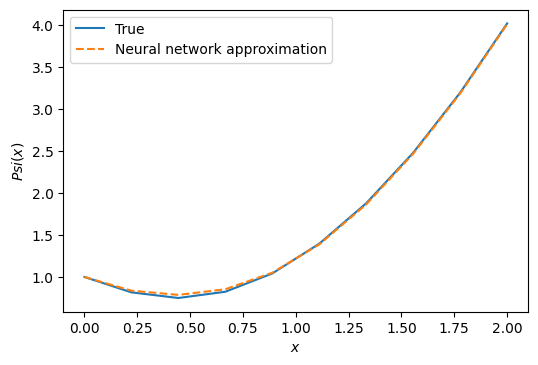

In [12]:
with torch.no_grad():
    yy = Psi_t(torch.Tensor(x_train)).numpy()  # Neural network
yt = np.exp(-x_train**2/2)/(1+x_train+x_train**2)+x_train**2 #f..... of x_train... Analyticas solution


fig, ax = plt.subplots(dpi=100)
ax.plot(x_train, yt, label='True')
ax.plot(x_train, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');

### Example 2

$$ \frac{d\psi}{dx} = e^{\frac{-x}{5}}\cos(x) - \frac{\psi}{5} = f $$ 
$$ \psi(0) = 0$$

With analytical solution given by 
$$ \bar{\Psi} = e^{-x/5}\cos(x)$$

In [23]:
N = nn.Sequential(nn.Linear(1, 5), nn.Sigmoid(), nn.Linear(5,1, bias=False))
Psi_t = lambda x: x * N(x) 
f = lambda x, Psi: torch.exp(-x/5)*torch.cos(x) - Psi/5
def loss(x):
    outputs = Psi_t(x) 
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs), create_graph=True)[0]
    final_loss = torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2)
    print('loss is', final_loss)
    return  final_loss
x_train = np.linspace(0, 2, 10)[:, None]
x = torch.Tensor(x_train)
x.requires_grad = True
optimizer = torch.optim.LBFGS(N.parameters())
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l
for i in range(5):
    optimizer.step(closure)

loss is tensor(0.4459, grad_fn=<MeanBackward0>)
loss is tensor(0.1701, grad_fn=<MeanBackward0>)
loss is tensor(0.1129, grad_fn=<MeanBackward0>)
loss is tensor(0.0340, grad_fn=<MeanBackward0>)
loss is tensor(0.0106, grad_fn=<MeanBackward0>)
loss is tensor(0.0047, grad_fn=<MeanBackward0>)
loss is tensor(0.0044, grad_fn=<MeanBackward0>)
loss is tensor(0.0041, grad_fn=<MeanBackward0>)
loss is tensor(0.0032, grad_fn=<MeanBackward0>)
loss is tensor(0.0016, grad_fn=<MeanBackward0>)
loss is tensor(0.0009, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0006, grad_fn=<MeanBackward0>)
loss is tensor(0.0005, grad_fn=<MeanBackward0>)
loss is tensor(0.0005, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0004, grad_fn=<MeanBackward0>)
loss is tensor(0.0003, grad_fn=<MeanBackward0>)
loss is tensor(0.0003, grad_fn=<MeanBackward0>)
loss is tensor(0.0003, grad_fn=<MeanBackward0>)
loss is tensor(0.0003, grad_fn=<MeanBack

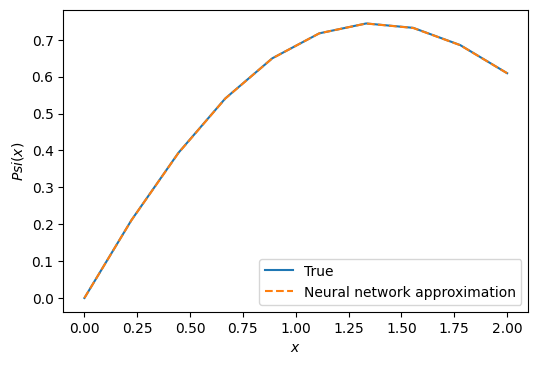

In [24]:
with torch.no_grad():
    yy = Psi_t(torch.Tensor(x_train)).numpy()  # Neural network
yt = np.exp(-x_train/5)*np.sin(x_train) #f..... of x_train... Analyticas solution


fig, ax = plt.subplots(dpi=100)
ax.plot(x_train, yt, label='True')
ax.plot(x_train, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');

### Example 3 (from the website): second order differential equation
https://www.analyticsvidhya.com/blog/2021/09/ordinary-differential-equations-made-easy-with-deep-learning/

$$\frac{d^2\Psi}{dx^2} = -1 $$
with Dirichlet boundary conditions:
$$\Psi(0) = 0 $$
$$\Psi(1) = 0 $$

In [25]:
N = nn.Sequential(nn.Linear(1, 5), nn.Sigmoid(), nn.Linear(5,1, bias=False))
Psi_t = lambda x: x * (1-x) * N(x) 
f = lambda x, Psi: -1
def loss(x):
    outputs = Psi_t(x) 
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs), create_graph=True)[0]
    Psi_t_x_x = torch.autograd.grad(Psi_t_x, x, grad_outputs=torch.ones_like(Psi_t_x), create_graph=True )[0]
    final_loss = torch.mean( ( Psi_t_x_x - f(x, outputs) )  ** 2)
    print('loss is', final_loss)
    return  final_loss
x_train = np.linspace(0, 1, 100)[:, None]
x = torch.Tensor(x_train)
x.requires_grad = True
optimizer = torch.optim.LBFGS(N.parameters())
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l
for i in range(5):
    optimizer.step(closure)

loss is tensor(2.4125, grad_fn=<MeanBackward0>)
loss is tensor(0.5480, grad_fn=<MeanBackward0>)
loss is tensor(0.1074, grad_fn=<MeanBackward0>)
loss is tensor(0.0851, grad_fn=<MeanBackward0>)
loss is tensor(0.0003, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0001, grad_fn=<MeanBackward0>)
loss is tensor(9.1113e-05, grad_fn=<MeanBackward0>)
loss is tensor(4.0597e-05, grad_fn=<MeanBackward0>)
loss is tensor(1.1875e-05, grad_fn=<MeanBackward0>)
loss is tensor(3.7777e-06, grad_fn=<MeanBackward0>)
loss is tensor(1.9180e-06, grad_fn=<MeanBackward0>)
loss is tensor(1.2679e-06, grad_fn=<MeanBackward0>)
loss is tensor(1.2316e-06, grad_fn=<MeanBackward0>)
loss is tensor(1.2305e-06, grad_fn=<MeanBackward0>)
loss is tensor(1.2305e-06, grad_fn=<MeanBackward0>)
loss

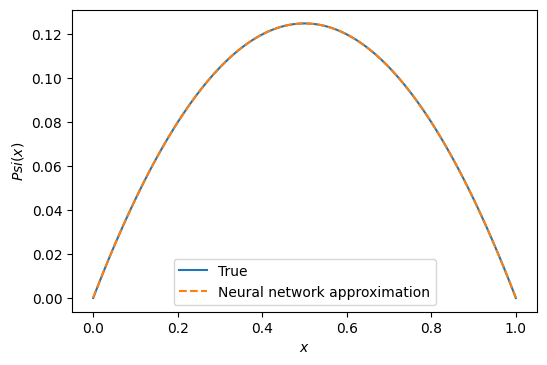

In [26]:
with torch.no_grad():
    yy = Psi_t(torch.Tensor(x_train)).numpy()  # Neural network
yt = 1/2*(-x_train**2 + x_train) #f..... of x_train... Analyticas solution


fig, ax = plt.subplots(dpi=100)
ax.plot(x_train, yt, label='True')
ax.plot(x_train, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');

### Example 4: integral equation (Volterra type, but also fredholm ok)

consider
$$ \Psi(t) = \alpha \int_0^t \Psi(s) + 1\,ds$$
which is obtained by
$$\Psi' = \alpha \Psi $$ 
with initial condition $$\Psi(0) = 1 $$
The analytical solution is $$\Psi(t) = e^{\alpha t}$$
Let's solve it as integral equation. Here approximating the integral will be done with rectangles

In [40]:
alpha = 1

N = nn.Sequential(nn.Linear(1, 5), nn.Sigmoid(), nn.Linear(5,1, bias=False))
Psi_t = lambda x: N(x)
f_integrand = lambda x, Psi: alpha*Psi
Psi_real = lambda x: torch.exp(alpha*x)

n_points = 20
x_train = np.linspace(0, 2, n_points)[:, None]       # Train from 0 to 2
x = torch.Tensor(x_train)
x.requires_grad = True
delta_x = 2/(n_points-1)

def loss(x):
    outputs = N(x)   
    sum_heights = N(x)
    for i in range(n_points):                    
        sum_heights[i] = torch.sum(outputs[0:i])   #Sum of Heights of the left-rectangles
    final_loss = torch.mean( (outputs - alpha*delta_x*sum_heights - 1)  ** 2)
    print('loss is', final_loss)
    return final_loss
optimizer = torch.optim.LBFGS(N.parameters(), lr=0.01)
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l
for i in range(200):
    optimizer.step(closure)

loss is tensor(1.1044, grad_fn=<MeanBackward0>)
loss is tensor(1.1061, grad_fn=<MeanBackward0>)
loss is tensor(1.1165, grad_fn=<MeanBackward0>)
loss is tensor(1.1273, grad_fn=<MeanBackward0>)
loss is tensor(1.1384, grad_fn=<MeanBackward0>)
loss is tensor(1.1500, grad_fn=<MeanBackward0>)
loss is tensor(1.1619, grad_fn=<MeanBackward0>)
loss is tensor(1.1743, grad_fn=<MeanBackward0>)
loss is tensor(1.1870, grad_fn=<MeanBackward0>)
loss is tensor(1.2002, grad_fn=<MeanBackward0>)
loss is tensor(1.2137, grad_fn=<MeanBackward0>)
loss is tensor(1.2277, grad_fn=<MeanBackward0>)
loss is tensor(1.2420, grad_fn=<MeanBackward0>)
loss is tensor(1.2568, grad_fn=<MeanBackward0>)
loss is tensor(1.2720, grad_fn=<MeanBackward0>)
loss is tensor(1.2876, grad_fn=<MeanBackward0>)
loss is tensor(1.3036, grad_fn=<MeanBackward0>)
loss is tensor(1.3200, grad_fn=<MeanBackward0>)
loss is tensor(1.3369, grad_fn=<MeanBackward0>)
loss is tensor(1.3542, grad_fn=<MeanBackward0>)
loss is tensor(1.3720, grad_fn=<MeanBack

loss is tensor(305.0049, grad_fn=<MeanBackward0>)
loss is tensor(305.4656, grad_fn=<MeanBackward0>)
loss is tensor(305.8842, grad_fn=<MeanBackward0>)
loss is tensor(306.2601, grad_fn=<MeanBackward0>)
loss is tensor(306.5930, grad_fn=<MeanBackward0>)
loss is tensor(306.8824, grad_fn=<MeanBackward0>)
loss is tensor(307.1280, grad_fn=<MeanBackward0>)
loss is tensor(307.3293, grad_fn=<MeanBackward0>)
loss is tensor(307.4861, grad_fn=<MeanBackward0>)
loss is tensor(307.5978, grad_fn=<MeanBackward0>)
loss is tensor(307.6644, grad_fn=<MeanBackward0>)
loss is tensor(307.6854, grad_fn=<MeanBackward0>)
loss is tensor(307.6606, grad_fn=<MeanBackward0>)
loss is tensor(307.5898, grad_fn=<MeanBackward0>)
loss is tensor(307.4729, grad_fn=<MeanBackward0>)
loss is tensor(307.3095, grad_fn=<MeanBackward0>)
loss is tensor(307.0997, grad_fn=<MeanBackward0>)
loss is tensor(306.8432, grad_fn=<MeanBackward0>)
loss is tensor(306.5400, grad_fn=<MeanBackward0>)
loss is tensor(306.1900, grad_fn=<MeanBackward0>)


loss is tensor(586.7889, grad_fn=<MeanBackward0>)
loss is tensor(573.9807, grad_fn=<MeanBackward0>)
loss is tensor(561.2615, grad_fn=<MeanBackward0>)
loss is tensor(548.6161, grad_fn=<MeanBackward0>)
loss is tensor(536.0553, grad_fn=<MeanBackward0>)
loss is tensor(523.5809, grad_fn=<MeanBackward0>)
loss is tensor(511.1757, grad_fn=<MeanBackward0>)
loss is tensor(498.8461, grad_fn=<MeanBackward0>)
loss is tensor(486.5855, grad_fn=<MeanBackward0>)
loss is tensor(474.4126, grad_fn=<MeanBackward0>)
loss is tensor(462.3358, grad_fn=<MeanBackward0>)
loss is tensor(450.3384, grad_fn=<MeanBackward0>)
loss is tensor(438.4247, grad_fn=<MeanBackward0>)
loss is tensor(426.6250, grad_fn=<MeanBackward0>)
loss is tensor(414.9298, grad_fn=<MeanBackward0>)
loss is tensor(403.3453, grad_fn=<MeanBackward0>)
loss is tensor(391.8663, grad_fn=<MeanBackward0>)
loss is tensor(380.5221, grad_fn=<MeanBackward0>)
loss is tensor(369.2887, grad_fn=<MeanBackward0>)
loss is tensor(358.1859, grad_fn=<MeanBackward0>)


loss is tensor(21.7318, grad_fn=<MeanBackward0>)
loss is tensor(21.1716, grad_fn=<MeanBackward0>)
loss is tensor(20.0548, grad_fn=<MeanBackward0>)
loss is tensor(19.5285, grad_fn=<MeanBackward0>)
loss is tensor(18.9462, grad_fn=<MeanBackward0>)
loss is tensor(18.5218, grad_fn=<MeanBackward0>)
loss is tensor(17.5764, grad_fn=<MeanBackward0>)
loss is tensor(17.1528, grad_fn=<MeanBackward0>)
loss is tensor(16.7413, grad_fn=<MeanBackward0>)
loss is tensor(16.3716, grad_fn=<MeanBackward0>)
loss is tensor(15.9506, grad_fn=<MeanBackward0>)
loss is tensor(15.6425, grad_fn=<MeanBackward0>)
loss is tensor(14.8744, grad_fn=<MeanBackward0>)
loss is tensor(14.5383, grad_fn=<MeanBackward0>)
loss is tensor(14.2498, grad_fn=<MeanBackward0>)
loss is tensor(13.8982, grad_fn=<MeanBackward0>)
loss is tensor(13.6464, grad_fn=<MeanBackward0>)
loss is tensor(13.1823, grad_fn=<MeanBackward0>)
loss is tensor(12.9268, grad_fn=<MeanBackward0>)
loss is tensor(12.6373, grad_fn=<MeanBackward0>)
loss is tensor(12.41

loss is tensor(0.4062, grad_fn=<MeanBackward0>)
loss is tensor(0.3981, grad_fn=<MeanBackward0>)
loss is tensor(0.3923, grad_fn=<MeanBackward0>)
loss is tensor(0.3831, grad_fn=<MeanBackward0>)
loss is tensor(0.3776, grad_fn=<MeanBackward0>)
loss is tensor(0.3679, grad_fn=<MeanBackward0>)
loss is tensor(0.3625, grad_fn=<MeanBackward0>)
loss is tensor(0.3541, grad_fn=<MeanBackward0>)
loss is tensor(0.3491, grad_fn=<MeanBackward0>)
loss is tensor(0.3406, grad_fn=<MeanBackward0>)
loss is tensor(0.3357, grad_fn=<MeanBackward0>)
loss is tensor(0.3279, grad_fn=<MeanBackward0>)
loss is tensor(0.3232, grad_fn=<MeanBackward0>)
loss is tensor(0.3156, grad_fn=<MeanBackward0>)
loss is tensor(0.3111, grad_fn=<MeanBackward0>)
loss is tensor(0.3038, grad_fn=<MeanBackward0>)
loss is tensor(0.2995, grad_fn=<MeanBackward0>)
loss is tensor(0.2928, grad_fn=<MeanBackward0>)
loss is tensor(0.2887, grad_fn=<MeanBackward0>)
loss is tensor(0.2821, grad_fn=<MeanBackward0>)
loss is tensor(0.2782, grad_fn=<MeanBack

loss is tensor(0.0151, grad_fn=<MeanBackward0>)
loss is tensor(0.0148, grad_fn=<MeanBackward0>)
loss is tensor(0.0146, grad_fn=<MeanBackward0>)
loss is tensor(0.0144, grad_fn=<MeanBackward0>)
loss is tensor(0.0142, grad_fn=<MeanBackward0>)
loss is tensor(0.0139, grad_fn=<MeanBackward0>)
loss is tensor(0.0137, grad_fn=<MeanBackward0>)
loss is tensor(0.0135, grad_fn=<MeanBackward0>)
loss is tensor(0.0133, grad_fn=<MeanBackward0>)
loss is tensor(0.0131, grad_fn=<MeanBackward0>)
loss is tensor(0.0129, grad_fn=<MeanBackward0>)
loss is tensor(0.0127, grad_fn=<MeanBackward0>)
loss is tensor(0.0125, grad_fn=<MeanBackward0>)
loss is tensor(0.0123, grad_fn=<MeanBackward0>)
loss is tensor(0.0121, grad_fn=<MeanBackward0>)
loss is tensor(0.0119, grad_fn=<MeanBackward0>)
loss is tensor(0.0118, grad_fn=<MeanBackward0>)
loss is tensor(0.0115, grad_fn=<MeanBackward0>)
loss is tensor(0.0114, grad_fn=<MeanBackward0>)
loss is tensor(0.0112, grad_fn=<MeanBackward0>)
loss is tensor(0.0110, grad_fn=<MeanBack

loss is tensor(0.0008, grad_fn=<MeanBackward0>)
loss is tensor(0.0008, grad_fn=<MeanBackward0>)
loss is tensor(0.0008, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, grad_fn=<MeanBackward0>)
loss is tensor(0.0006, grad_fn=<MeanBackward0>)
loss is tensor(0.0006, grad_fn=<MeanBackward0>)
loss is tensor(0.0006, grad_fn=<MeanBackward0>)
loss is tensor(0.0006, grad_fn=<MeanBackward0>)
loss is tensor(0.0006, grad_fn=<MeanBackward0>)
loss is tensor(0.0006, grad_fn=<MeanBack

loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBack

loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBack

loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBack

loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBack

loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, grad_fn=<MeanBack

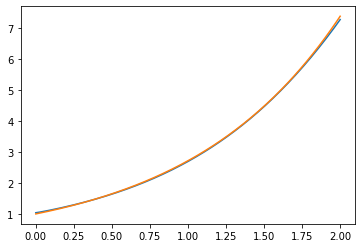

In [41]:
fig, ax = plt.subplots()
xx = x.tolist()
yy = Psi_t(x)[:,0].tolist()
yt = Psi_real(x).tolist()
ax.plot(xx, yy)
ax.plot(xx,yt)

#### To do. Then compare with other integration methods, the gauss-legendre. And to do. Solve the previous examples using integral equations

### Example with fractional Riccati

In [131]:
T = 2
alpha = 0.64
lambd = 0.2
mu = 0
nu = 0.2

N = nn.Sequential(nn.Linear(1, 10), nn.Sigmoid(),nn.Linear(10,1, bias=False))
Psi_t = lambda x: x**alpha*N(x)   #x**alpha * N(x)  # Trial solution

n_points = 65

n_legendre = 15

nodes, weights = scipy.special.roots_legendre(n_legendre)
weights_tensor = torch.tensor(weights)[:,None].float()
nodes_tensor = torch.tensor(nodes)[:,None].float()

def f(x):
    return x**(1/1)

x_train = f(np.linspace(0, T**1, n_points)[:, None])
x = torch.Tensor(x_train)
x.requires_grad = True

def g(x):
    result = lambd*Psi_t(x)**2+mu*Psi_t(x)+nu
    return result

def g_ia(s,t):
    return (t-s)**(alpha-1)*g(s)

def loss(x):
    
    outputs = Psi_t(x)
    
    
    # Notice that the below is indipendent by how x is distributed (could be a different distribution of points)
    integrals_vector = x.double() # just copying x, but then we will change it, only to have something with same dimen.
    for i in range(n_points):
        if i == 0:
            integrals_vector[0][0] = 0
        else:
            t = x[i]
            transf_x_vals_tens = nodes_tensor*t/2 + t/2

            integrands_values = g_ia(transf_x_vals_tens, t)
            # print("integrands_values", integrands_values)
            integral_at_time_t = 1/math.gamma(alpha)*t/2*torch.sum(integrands_values * weights_tensor)

            integrals_vector[i][0] = integral_at_time_t
        
    final_loss = torch.mean((outputs - integrals_vector)**2)
    
    print('loss is', final_loss)

    return final_loss

optimizer = torch.optim.LBFGS(N.parameters(), lr=1)

def closure():

    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    
    return l

import time
start_time = time.time()
optimizer.step(closure)
print("final timing:", time.time() - start_time)

loss is tensor(0.5183, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(0.0011, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(0.0007, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(0.0006, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(0.0005, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(0.0002, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(5.6380e-05, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(4.3736e-06, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(1.1373e-06, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(1.0165e-06, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(1.0154e-06, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is tensor(1.0143e-06, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss is te

In [110]:
epsilon = 0.01
theta = 0.9

r_max = 105

def returns_all_the_first_r_max_coefficients_as_list_2():
    ''' Run this function. This returns the list of coefficients. Up to a_k where 
        k = r_max. '''
    
    coefficients = [np.nan]*(r_max+1)

    a0 = 0 
    a1 = nu/math.gamma(alpha+1)
    coefficients[0] = a0
    coefficients[1] = a1
    
    
    def recursive_convol_coefficients(list_of_coefficients, k):
        ''' return a*_k^2  given the first k-1 a_m coefficients. 
        k is the coefficient a^_k^2 to be returned'''
        if k==1:
            return 0
        else: 
            sum = 0
            for l in range(1,k):
                a_l = list_of_coefficients[l]
                a_k_l = list_of_coefficients[k-l]
                sum += a_l*a_k_l
            return sum
    
    
    def recursive_coefficients(list_of_coefficients, n):
        ''' Given the convoluted coefficient a_k_star_quadro, 
        Given also n, the coefficient a_n to be returned... Note that n = k+1 !!! 
        returns a_k'''
        k = n-1 # n-1 = k
        a_k_star_quadro = recursive_convol_coefficients(list_of_coefficients, k) 
        a_k = list_of_coefficients[k]  
        a_n = (lambd*a_k_star_quadro + mu*a_k)*math.gamma(alpha*k + 1)/math.gamma(alpha*k + alpha + 1)
    
        return a_n

    for i in range(2, r_max+1):
        coefficients[i] = recursive_coefficients( coefficients, i)
        
    return coefficients

coeff = returns_all_the_first_r_max_coefficients_as_list_2()

coeff_df = pd.DataFrame(coeff)

a_r_max = coeff[-1]
a_primo_r_max = a_r_max*math.gamma(alpha*r_max+1)/(math.gamma(alpha*r_max-alpha+1)*(alpha*r_max+1-alpha))

R_estimate = abs(a_primo_r_max)**(-1/(alpha*r_max))

r_0 = math.log(epsilon*(1-theta))/alpha/math.log(theta)-1
r_0 = int(np.round(r_0)+1)

slicing = slice(0,r_0)

coeff_truncated = coeff[slicing]

def poly(lst, x):   
    ''' Evaluate the polynomial with coefficients lst= [a0,a1,a2,...] in x
    Pol: a0 + a1*x**alpha + a2*x**(2*alpha) + .... '''
    n, tmp = 0, 0
    for a in lst:
        tmp = tmp + (a * (x**(n*alpha)))
        n += 1

    return tmp

def computing_psi_n(n):
    ''' Just Give n. This function makes use of the parameters. Then also of the list "coeff_truncated" 
    '''
    
    disc_times = [k*T/n for k in range(0,n+1)]
    
    theta = 0.9
    #theta = theta_n(n) # Only In This Example, Because The Theta fixed at the beginning would go out otherwise!
    
    
    
    k_0 = math.floor(R_estimate*theta*n/T)  ### Up to t_k_0 we will use truncated series. Then Euler Schema
    
    if k_0 >= len(disc_times):
        t_k_0 = "Doesn't exist t_k_0"
    else: 
        t_k_0 = disc_times[k_0]
    
    values_assumed_in_disc_times = [np.nan]*(n+1)
    

    
    
    ### Here We Evaluate The Truncated Series!
    
    if k_0 <= len(disc_times):
        for k in range(0,k_0+1):
            values_assumed_in_disc_times[k] = poly(coeff_truncated, disc_times[k])
    else:
        for k in range(0,n):
            values_assumed_in_disc_times[k] = poly(coeff_truncated, disc_times[k])
    
    
    
    
    ### Here Instead We Use The Euler Scheme
    def compute_c_i(alpha, l):
        if l == 0:
            return 1
        else: 
            return (l+1)**alpha - l**alpha
    
    
    
    for k in range(k_0+1, n+1):
        factor_1 = 1/math.gamma(alpha + 1)*(T/n)**alpha
        addend_2 = nu*k**alpha 
        addend_3 = 0
        for l in range(1,k):
            psi_n_t_l = values_assumed_in_disc_times[l]
            addend_3 += compute_c_i(alpha, k-l-1)*psi_n_t_l*(lambd*psi_n_t_l + mu)
        
        factor_2 = addend_2 + addend_3
        
        result = factor_1*factor_2
        
        values_assumed_in_disc_times[k] = result
            
    
    print("t_k0=", t_k_0)
    
    #return disc_times, values_assumed_in_disc_times
    return pd.DataFrame({"time": disc_times, "value": values_assumed_in_disc_times}), t_k_0

In [111]:
R_estimate

10.8337548150555

In [112]:
T

2

In [113]:
r_0

102

In [114]:
comparison = computing_psi_n(64)

t_k0= Doesn't exist t_k_0


In [115]:
results_euler_scheme = comparison[0]

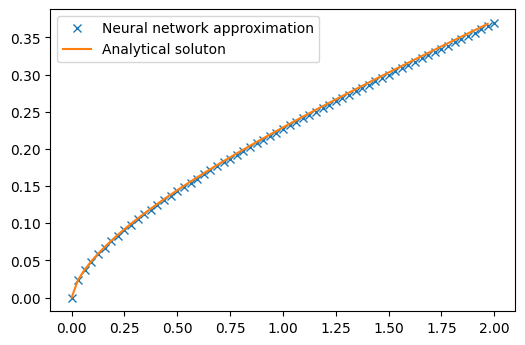

In [132]:
fig, ax = plt.subplots(dpi=100)
xx = x.tolist()
yy = Psi_t(x)[:,0].tolist()
# yt = Psi_real(x).tolist()
ax.plot(xx, yy, "x",  label='Neural network approximation')
ax.plot(results_euler_scheme.time, results_euler_scheme.value, "-",  label='Analytical soluton')

ax.legend(loc="best")

if type(comparison[1]) == type(2.0):
    ax.axvline(x = comparison[1], linewidth=1, color='r')
    
fig.savefig("fract_ric.png")

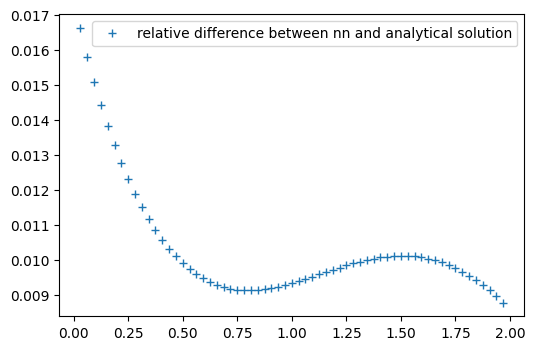

In [133]:
fig, ax = plt.subplots(dpi=100)
xx = x.tolist()
yy = Psi_t(x)[:,0].tolist()
# yt = Psi_real(x).tolist()
#ax.plot(xx, yy, "x",  label='Neural network approximation')
ax.plot(results_euler_scheme.time, np.abs(yy-results_euler_scheme.value)/results_euler_scheme.value, "+",  label='relative difference between nn and analytical solution')

ax.legend(loc="best")

if type(comparison[1]) == type(2.0):
    ax.axvline(x = comparison[1], linewidth=1, color='r')
    
fig.savefig("fract_ric_errors.png")